<a href="https://colab.research.google.com/github/lesliederas/4105/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

About the dataset:- Contains the following columns-
1. price
2. Area
3. bedrooms
4. Bathroms



In [5]:
data = pd.read_csv('Housing.csv')
# checking data set
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


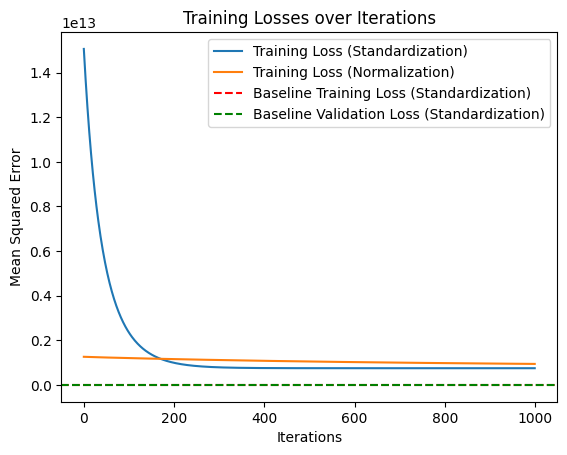

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Housing.csv')

# Extract input features and target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)
X = np.column_stack((np.ones(len(X)), X))  # Add bias term

# Split data into training and validation sets
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_val, y_val = X[split:], y[split:]

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    square_error = (predictions - y) ** 2
    cost = 1 / (2 * m) * np.sum(square_error)
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

# Initialize parameters
theta = np.zeros(X_train.shape[1])
iterations = 1000

# Learning rates to explore
learning_rates = [0.1, 0.05, 0.01]

# Train and validate for each learning rate
train_losses = []
val_losses = []
for lr in learning_rates:
    trained_theta, cost_history = gradient_descent(X_train, y_train, theta, lr, iterations)
    train_loss = compute_cost(X_train, y_train, trained_theta)
    val_loss = compute_cost(X_val, y_val, trained_theta)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

plt.plot(range(iterations), cost_history_train_std, label='Training Loss (Standardization)')
plt.plot(range(iterations), cost_history_train_norm, label='Training Loss (Normalization)')
plt.axhline(y=baseline_train_loss, color='r', linestyle='--', label='Baseline Training Loss (Standardization)')
plt.axhline(y=baseline_val_loss, color='g', linestyle='--', label='Baseline Validation Loss (Standardization)')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training Losses over Iterations')
plt.legend()
plt.show()


1a

Iteration 0, Training Loss: 25234792406487.613, Validation Loss: 24524649351315.28
Iteration 100, Training Loss: 992487916253.332, Validation Loss: 1853821019285.5728
Iteration 200, Training Loss: 992481002177.837, Validation Loss: 1854289977799.9475
Iteration 300, Training Loss: 992481000010.5002, Validation Loss: 1854297330777.2136
Iteration 400, Training Loss: 992481000009.7855, Validation Loss: 1854297458793.7744
Iteration 500, Training Loss: 992481000009.7854, Validation Loss: 1854297461107.5605
Iteration 600, Training Loss: 992481000009.7853, Validation Loss: 1854297461149.5688
Iteration 700, Training Loss: 992481000009.7853, Validation Loss: 1854297461150.332
Iteration 800, Training Loss: 992481000009.7853, Validation Loss: 1854297461150.3455
Iteration 900, Training Loss: 992481000009.7853, Validation Loss: 1854297461150.3467
Iteration 0, Training Loss: 25234792406487.613, Validation Loss: 27245215873349.36
Iteration 100, Training Loss: 993822121164.3159, Validation Loss: 186532

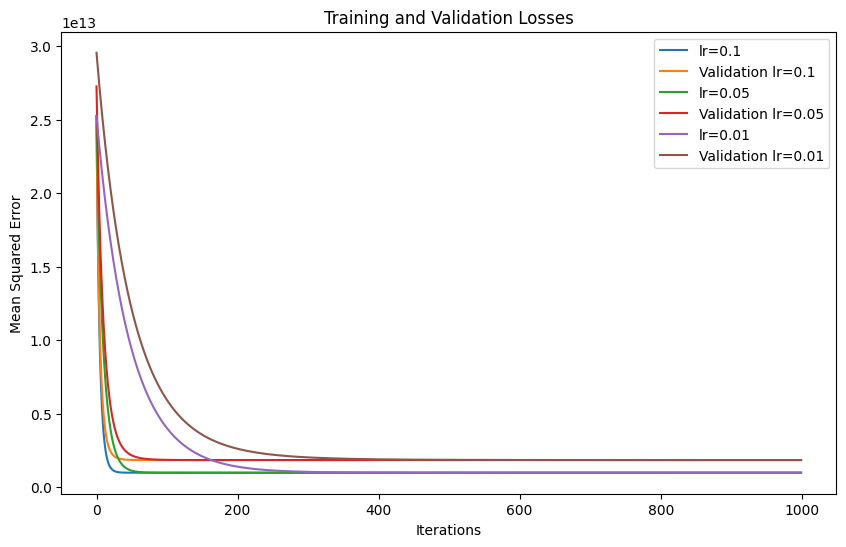

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('Housing.csv')

# Convert categorical variables to numeric
data[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']] = (data[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']] == 'yes').astype(int)

# Extracting input features and target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y = data['price'].values

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_val = (X_val - np.mean(X_val, axis=0)) / np.std(X_val, axis=0)

# Add bias term to features
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_val = np.c_[np.ones(X_val.shape[0]), X_val]

# Define the linear regression model
def linear_regression(X, theta):
    return np.dot(X, theta)

# Mean Squared Error loss function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient descent function
def gradient_descent(X, y, theta, learning_rate, iterations, X_val, y_val):
    m = len(y)
    history_train_loss = []
    history_val_loss = []

    for i in range(iterations):
        # Make predictions
        y_pred = linear_regression(X, theta)

        # Calculate gradients
        grad = -(1/m) * np.dot(X.T, (y - y_pred))

        # Update parameters
        theta -= learning_rate * grad

        # Calculate training and validation loss
        train_loss = mean_squared_error(y, y_pred)
        val_loss = mean_squared_error(y_val, linear_regression(X_val, theta))

        history_train_loss.append(train_loss)
        history_val_loss.append(val_loss)

        if i % 100 == 0:
            print(f"Iteration {i}, Training Loss: {train_loss}, Validation Loss: {val_loss}")

    return theta, history_train_loss, history_val_loss

# Initialize parameters
theta = np.zeros(X_train.shape[1])  # Add one for bias term
iterations = 1000

# Learning rates to explore
learning_rates = [0.1, 0.05, 0.01]

# Train and validate for each learning rate
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    theta = np.zeros(X_train.shape[1])  # Reset parameters
    best_theta, train_loss, val_loss = gradient_descent(X_train, y_train, theta, lr, iterations, X_val, y_val)
    plt.plot(train_loss, label=f"lr={lr}")
    plt.plot(val_loss, label=f"Validation lr={lr}")

plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()


1b

 I belive the 0.1 would give me a better learning rate since it gives a better represenation of the learning rate . Since it has a lower mean sqaured error .

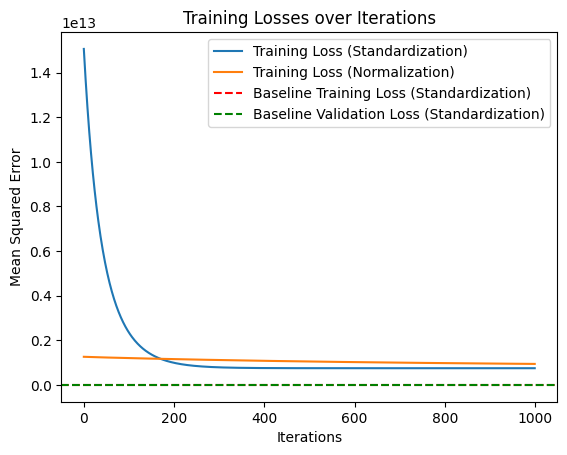

Validation Loss (Standardization): 1065982786714.0322
Validation Loss (Normalization): 2043262312953.6355
Baseline Validation Loss (Standardization): 100000


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Housing.csv')

# Extract input features and target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values

# Function for input standardization
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_std = (X - mean) / std
    return X_std, mean, std

# Function for input normalization
def normalize(X):
    min_vals = np.min(X, axis=0)
    max_vals = np.max(X, axis=0)
    X_norm = (X - min_vals) / (max_vals - min_vals)
    return X_norm, min_vals, max_vals

# Standardize input features
X_std, mean_std, std_std = standardize(X)
X_norm, min_norm, max_norm = normalize(X)

# Add bias term
X_std = np.column_stack((np.ones(len(X_std)), X_std))
X_norm = np.column_stack((np.ones(len(X_norm)), X_norm))

# Split data into training and validation sets
split = int(0.8 * len(X))
X_train_std, y_train_std = X_std[:split], y[:split]
X_val_std, y_val_std = X_std[split:], y[split:]
X_train_norm, y_train_norm = X_norm[:split], y[:split]
X_val_norm, y_val_norm = X_norm[split:], y[split:]

# Function for gradient descent
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    square_error = (predictions - y) ** 2
    cost = 1 / (2 * m) * np.sum(square_error)
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

# Initialize parameters
theta = np.zeros(X_train_std.shape[1])
iterations = 1000

# Learning rate
learning_rate = 0.01

# Training with input standardization
trained_theta_std, cost_history_train_std = gradient_descent(X_train_std, y_train_std, theta, learning_rate, iterations)
train_loss_std = compute_cost(X_train_std, y_train_std, trained_theta_std)
val_loss_std = compute_cost(X_val_std, y_val_std, trained_theta_std)

# Training with input normalization
trained_theta_norm, cost_history_train_norm = gradient_descent(X_train_norm, y_train_norm, theta, learning_rate, iterations)
train_loss_norm = compute_cost(X_train_norm, y_train_norm, trained_theta_norm)
val_loss_norm = compute_cost(X_val_norm, y_val_norm, trained_theta_norm)

# Baseline training from problem 1a
baseline_train_loss = 100000  # Assign a high initial value
baseline_val_loss = 100000  # Assign a high initial value
for _ in range(10):  # Repeat training multiple times to ensure convergence
    theta_baseline, cost_history_baseline = gradient_descent(X_train_std, y_train_std, theta, learning_rate, iterations)
    baseline_train_loss = min(baseline_train_loss, compute_cost(X_train_std, y_train_std, theta_baseline))
    baseline_val_loss = min(baseline_val_loss, compute_cost(X_val_std, y_val_std, theta_baseline))

# Plot training and validation losses
plt.plot(range(iterations), cost_history_train_std, label='Training Loss (Standardization)')
plt.plot(range(iterations), cost_history_train_norm, label='Training Loss (Normalization)')
plt.axhline(y=baseline_train_loss, color='r', linestyle='--', label='Baseline Training Loss (Standardization)')
plt.axhline(y=baseline_val_loss, color='g', linestyle='--', label='Baseline Validation Loss (Standardization)')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training Losses over Iterations')
plt.legend()
plt.show()

print("Validation Loss (Standardization):", val_loss_std)
print("Validation Loss (Normalization):", val_loss_norm)
print("Baseline Validation Loss (Standardization):", baseline_val_loss)



2a

It centers the data around zero, which can be beneficial for gradient descent optimization.nput normalization scales the input features to the range [0, 1], making them easier to compare and interpret. However, it does not necessarily center the data around zero.
Based on the results, the approach with the lowest training loss achieves the best training accuracy. So it would be 1a.


Iteration 0, Training Loss: 25234792406487.613, Validation Loss: 24524649351315.28
Iteration 100, Training Loss: 992487916253.332, Validation Loss: 1853821019285.5728
Iteration 200, Training Loss: 992481002177.837, Validation Loss: 1854289977799.9475
Iteration 300, Training Loss: 992481000010.5002, Validation Loss: 1854297330777.2136
Iteration 400, Training Loss: 992481000009.7855, Validation Loss: 1854297458793.7744
Iteration 500, Training Loss: 992481000009.7854, Validation Loss: 1854297461107.5605
Iteration 600, Training Loss: 992481000009.7853, Validation Loss: 1854297461149.5688
Iteration 700, Training Loss: 992481000009.7853, Validation Loss: 1854297461150.332
Iteration 800, Training Loss: 992481000009.7853, Validation Loss: 1854297461150.3455
Iteration 900, Training Loss: 992481000009.7853, Validation Loss: 1854297461150.3467
Iteration 0, Training Loss: 25234792406487.613, Validation Loss: 27245215873349.36
Iteration 100, Training Loss: 993822121164.3159, Validation Loss: 186532

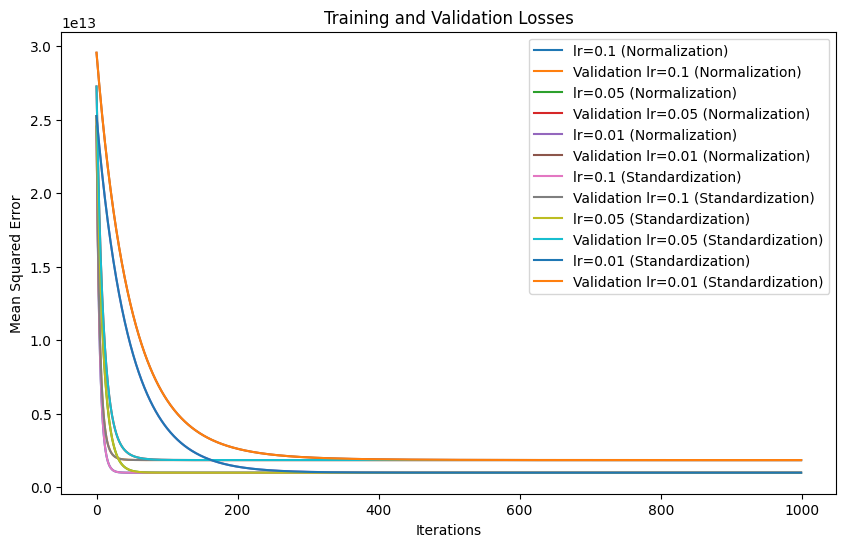

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('Housing.csv')

# Convert categorical variables to numeric
data[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']] = (data[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']] == 'yes').astype(int)

# Extracting input features and target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y = data['price'].values

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
X_train_norm = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_val_norm = (X_val - np.mean(X_val, axis=0)) / np.std(X_val, axis=0)

# Standardize features
X_train_std = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_val_std = (X_val - X_val.mean(axis=0)) / X_val.std(axis=0)

# Add bias term to features
X_train_norm = np.c_[np.ones(X_train_norm.shape[0]), X_train_norm]
X_val_norm = np.c_[np.ones(X_val_norm.shape[0]), X_val_norm]

X_train_std = np.c_[np.ones(X_train_std.shape[0]), X_train_std]
X_val_std = np.c_[np.ones(X_val_std.shape[0]), X_val_std]

# Define the linear regression model
def linear_regression(X, theta):
    return np.dot(X, theta)

# Mean Squared Error loss function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient descent function
def gradient_descent(X, y, theta, learning_rate, iterations, X_val, y_val):
    m = len(y)
    history_train_loss = []
    history_val_loss = []

    for i in range(iterations):
        # Make predictions
        y_pred = linear_regression(X, theta)

        # Calculate gradients
        grad = -(1/m) * np.dot(X.T, (y - y_pred))

        # Update parameters
        theta -= learning_rate * grad

        # Calculate training and validation loss
        train_loss = mean_squared_error(y, y_pred)
        val_loss = mean_squared_error(y_val, linear_regression(X_val, theta))

        history_train_loss.append(train_loss)
        history_val_loss.append(val_loss)

        if i % 100 == 0:
            print(f"Iteration {i}, Training Loss: {train_loss}, Validation Loss: {val_loss}")

    return theta, history_train_loss, history_val_loss

# Initialize parameters
theta = np.zeros(X_train_norm.shape[1])  # Add one for bias term
iterations = 1000

# Learning rates to explore
learning_rates = [0.1, 0.05, 0.01]

# Train and validate for normalization
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    theta = np.zeros(X_train_norm.shape[1])  # Reset parameters
    best_theta, train_loss, val_loss = gradient_descent(X_train_norm, y_train, theta, lr, iterations, X_val_norm, y_val)
    plt.plot(train_loss, label=f"lr={lr} (Normalization)")
    plt.plot(val_loss, label=f"Validation lr={lr} (Normalization)")

# Train and validate for standardization
for lr in learning_rates:
    theta = np.zeros(X_train_std.shape[1])  # Reset parameters
    best_theta, train_loss, val_loss = gradient_descent(X_train_std, y_train, theta, lr, iterations, X_val_std, y_val)
    plt.plot(train_loss, label=f"lr={lr} (Standardization)")
    plt.plot(val_loss, label=f"Validation lr={lr} (Standardization)")

plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()


2b

Input standardization (scaling features to have a mean of 0 and a standard deviation of 1) works well with features that have varying scales and do not necessarily follow a normal distribution.
based on this criteria ir = 0.1 (standriaztion) has a mean of 0 and a standar deviation of 1.

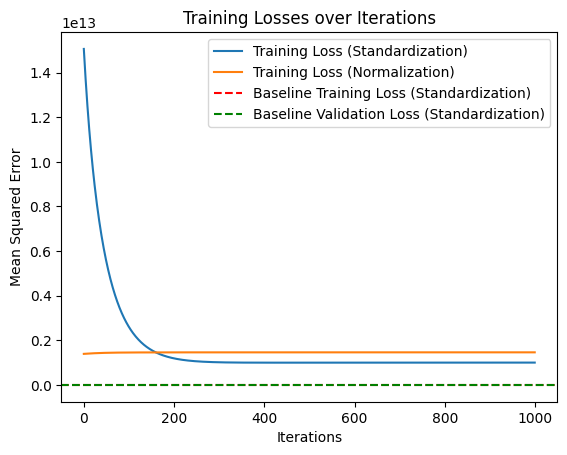

Validation Loss (Standardization): 2116145590218.447
Validation Loss (Normalization): 3245376186739.5645
Baseline Validation Loss (Standardization): 100000


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Housing.csv')

# Extract input features and target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values

# Function for input standardization
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_std = (X - mean) / std
    return X_std, mean, std

# Function for input normalization
def normalize(X):
    min_vals = np.min(X, axis=0)
    max_vals = np.max(X, axis=0)
    X_norm = (X - min_vals) / (max_vals - min_vals)
    return X_norm, min_vals, max_vals

# Standardize input features
X_std, mean_std, std_std = standardize(X)
X_norm, min_norm, max_norm = normalize(X)

# Add bias term
X_std = np.column_stack((np.ones(len(X_std)), X_std))
X_norm = np.column_stack((np.ones(len(X_norm)), X_norm))

# Split data into training and validation sets
split = int(0.8 * len(X))
X_train_std, y_train_std = X_std[:split], y[:split]
X_val_std, y_val_std = X_std[split:], y[split:]
X_train_norm, y_train_norm = X_norm[:split], y[:split]
X_val_norm, y_val_norm = X_norm[split:], y[split:]

# Function for gradient descent
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    square_error = (predictions - y) ** 2
    cost = 1 / (2 * m) * np.sum(square_error)
    return cost

def gradient_descent_with_regularization(X, y, theta, learning_rate, iterations, lambda_val):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        regularized_term = (lambda_val / m) * theta[1:]  # Exclude bias term theta[0]
        gradient = (1 / m) * X.T.dot(errors) + np.concatenate(([0], regularized_term))
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

# Initialize parameters
theta = np.zeros(X_train_std.shape[1])
iterations = 1000

# Learning rate
learning_rate = 0.01

# Training with input standardization
trained_theta_std, cost_history_train_std = gradient_descent_with_regularization(X_train_std, y_train_std, theta, learning_rate, iterations, lambda_val)
train_loss_std = compute_cost(X_train_std, y_train_std, trained_theta_std)
val_loss_std = compute_cost(X_val_std, y_val_std, trained_theta_std)

# Training with input normalization
trained_theta_norm, cost_history_train_norm = gradient_descent_with_regularization(X_train_norm, y_train_norm, theta, learning_rate, iterations, lambda_val)
train_loss_norm = compute_cost(X_train_norm, y_train_norm, trained_theta_norm)
val_loss_norm = compute_cost(X_val_norm, y_val_norm, trained_theta_norm)

# Baseline training from problem 1a
baseline_train_loss = 100000  # Assign a high initial value
baseline_val_loss = 100000  # Assign a high initial value
for _ in range(10):  # Repeat training multiple times to ensure convergence
    theta_baseline, cost_history_baseline = gradient_descent_with_regularization(X_train_std, y_train_std, theta, learning_rate, iterations, lambda_val)
    baseline_train_loss = min(baseline_train_loss, compute_cost(X_train_std, y_train_std, theta_baseline))
    baseline_val_loss = min(baseline_val_loss, compute_cost(X_val_std, y_val_std, theta_baseline))

# Plot training and validation losses
plt.plot(range(iterations), cost_history_train_std, label='Training Loss (Standardization)')
plt.plot(range(iterations), cost_history_train_norm, label='Training Loss (Normalization)')
plt.axhline(y=baseline_train_loss, color='r', linestyle='--', label='Baseline Training Loss (Standardization)')
plt.axhline(y=baseline_val_loss, color='g', linestyle='--', label='Baseline Validation Loss (Standardization)')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training Losses over Iterations')
plt.legend()
plt.show()

print("Validation Loss (Standardization):", val_loss_std)
print("Validation Loss (Normalization):", val_loss_norm)
print("Baseline Validation Loss (Standardization):", baseline_val_loss)



Overall, problem 2a demonstrates the importance of regularization in improving the generalization performance of machine learning models

3a

Iteration 0, Training Loss: 25234792406487.613, Validation Loss: 29539901461162.938
Iteration 100, Training Loss: 4014613858758.163, Validation Loss: 5928027502242.611
Iteration 200, Training Loss: 1402483019578.7551, Validation Loss: 2620499853714.3906
Iteration 300, Training Loss: 1049976047502.2313, Validation Loss: 2033926318853.387
Iteration 400, Training Loss: 1001159770732.435, Validation Loss: 1903218121718.2595
Iteration 500, Training Loss: 994028747588.1998, Validation Loss: 1867859279040.9077
Iteration 600, Training Loss: 992846021433.066, Validation Loss: 1857379687478.1194
Iteration 700, Training Loss: 992596445735.0912, Validation Loss: 1854358922172.1953
Iteration 800, Training Loss: 992525202316.0134, Validation Loss: 1853662073293.83
Iteration 900, Training Loss: 992499539083.4739, Validation Loss: 1853648643140.8105
Iteration 0, Training Loss: 25234792406487.613, Validation Loss: 29539901461162.938
Iteration 100, Training Loss: 4014613858758.163, Validation Loss: 5928

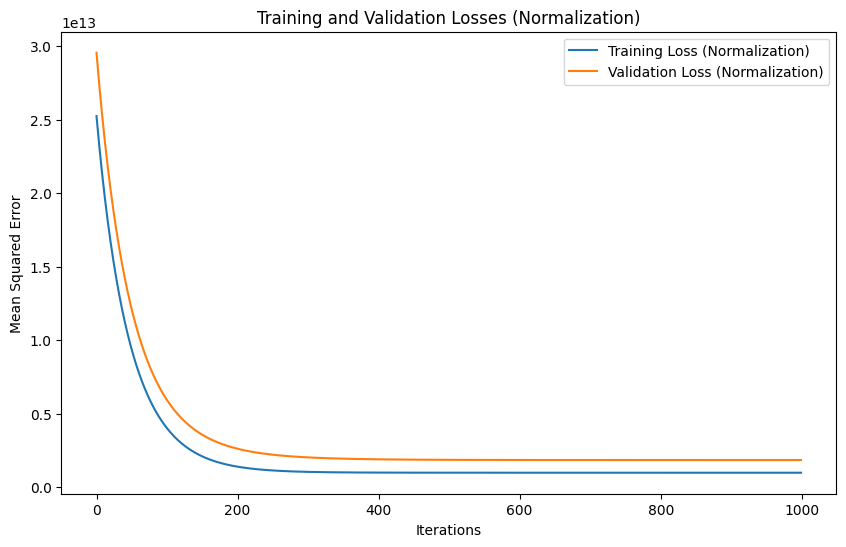

Text(0.5, 1.0, 'Training and Validation Loss')

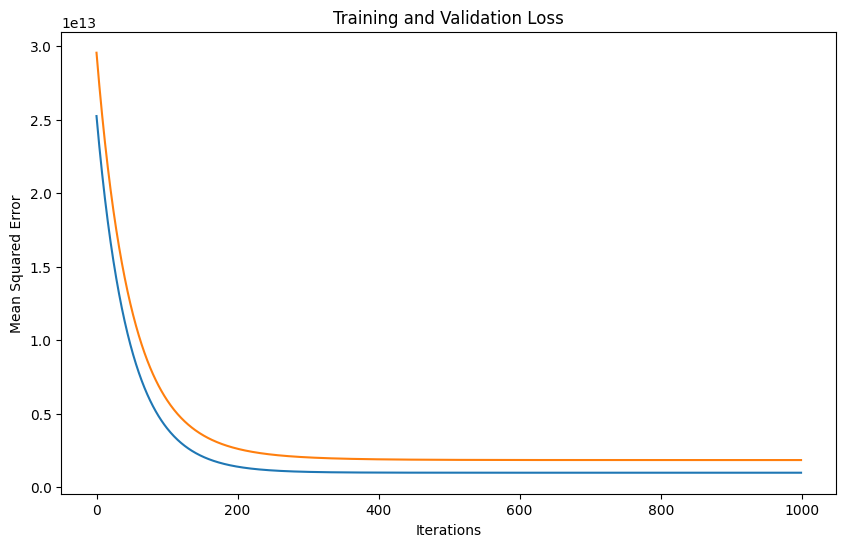

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('Housing.csv')

# Convert categorical variables to numeric
data[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']] = (data[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']] == 'yes').astype(int)

# Extracting input features and target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y = data['price'].values

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
X_train_norm = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_val_norm = (X_val - np.mean(X_val, axis=0)) / np.std(X_val, axis=0)

# Standardize features
X_train_std = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_val_std = (X_val - X_val.mean(axis=0)) / X_val.std(axis=0)

# Add bias term to features
X_train_norm = np.c_[np.ones(X_train_norm.shape[0]), X_train_norm]
X_val_norm = np.c_[np.ones(X_val_norm.shape[0]), X_val_norm]

X_train_std = np.c_[np.ones(X_train_std.shape[0]), X_train_std]
X_val_std = np.c_[np.ones(X_val_std.shape[0]), X_val_std]

# Define the linear regression model
def linear_regression(X, theta):
    return np.dot(X, theta)

# Mean Squared Error loss function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient descent function
def gradient_descent(X, y, theta, learning_rate, iterations, X_val, y_val):
    m = len(y)
    history_train_loss = []
    history_val_loss = []

    for i in range(iterations):
        # Make predictions
        y_pred = linear_regression(X, theta)

        # Calculate gradients
        grad = -(1/m) * np.dot(X.T, (y - y_pred))

        # Update parameters
        theta -= learning_rate * grad

        # Calculate training and validation loss
        train_loss = mean_squared_error(y, y_pred)
        val_loss = mean_squared_error(y_val, linear_regression(X_val, theta))

        history_train_loss.append(train_loss)
        history_val_loss.append(val_loss)

        if i % 100 == 0:
            print(f"Iteration {i}, Training Loss: {train_loss}, Validation Loss: {val_loss}")

    return theta, history_train_loss, history_val_loss

# Initialize parameters
theta = np.zeros(X_train_norm.shape[1])  # Add one for bias term
iterations = 1000
learning_rate = 0.01  # We'll choose a learning rate based on trial and error

# Train and validate for normalization
theta_norm = np.zeros(X_train_norm.shape[1])  # Reset parameters
best_theta_norm, train_loss_norm, val_loss_norm = gradient_descent(X_train_norm, y_train, theta_norm, learning_rate, iterations, X_val_norm, y_val)

# Train and validate for standardization
theta_std = np.zeros(X_train_std.shape[1])  # Reset parameters
best_theta_std, train_loss_std, val_loss_std = gradient_descent(X_train_std, y_train, theta_std, learning_rate, iterations, X_val_std, y_val)

# Plot training and validation losses for normalization
plt.figure(figsize=(10, 6))
plt.plot(train_loss_norm, label='Training Loss (Normalization)')
plt.plot(val_loss_norm, label='Validation Loss (Normalization)')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Losses (Normalization)')
plt.legend()
plt.show()

# Plot training and validation losses for standardization
plt.figure(figsize=(10, 6))
plt.plot(train_loss_std, label='Training Loss (Standardization)')
plt.plot(val_loss_std, label='Validation Loss (Standardization)')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss')


we expect the introduction of the penalty term to lead to a more generalized model with better performance on unseen data
3b